# The MNIST dataset, or Modified National Institute of Standards and Technology dataset, 
         is a widely-used collection of handwritten digits that serves as a fundamental benchmark in machine learning, particularly for image classification tasks. 

#### Key characteristics of the MNIST dataset:
##### Content:
      It consists of 70,000 grayscale images of handwritten digits (0-9).
#### Size:
     Each image is 28x28 pixels, making it computationally efficient for training and testing models.
#### Structure:
The dataset is divided into a training set of 60,000 images and a test set of 10,000 images, ensuring a clear separation for model evaluation.
#### Purpose:
        MNIST is frequently used as a "hello world" example for beginners in machine learning and serves as a standard for evaluating and comparing the performance of various image classification algorithms.
#### Availability:
It is readily available through various platforms and libraries, including Kaggle, GitHub, and integrated into popular machine learning frameworks like TensorFlow and PyTorch

# Loading data : already packed in keras 

In [7]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

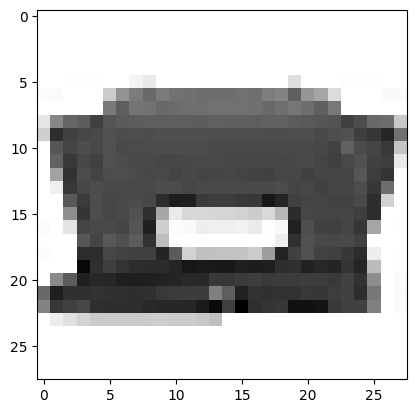

In [8]:
import matplotlib.pyplot as plt
digit = train_images[999]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Defining Network Architecture`1

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.models.Sequential([
                            layers.Dense(512, activation="relu"),
                            layers.Dense(10, activation="softmax")
                        ])

### Reshaping data(image array) from 2d image array  to 1d inage array 
### because ANN (Dense) layers eats 1d array.

In [3]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

# Encoding labels from numbers to one hot encoded array
       - if we use encoded labels we will use categorical crossentropy
       - if we use labels as numbers we will use sparse categroical cross entropy

In [4]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7508 - loss: 0.7250
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8276 - loss: 0.4830
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8484 - loss: 0.4173
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8597 - loss: 0.3835
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8694 - loss: 0.3553


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0154 - loss: 2.4778


In [8]:
from PIL import Image
import numpy as np

In [9]:
image = Image.open(r'IMG-20250815-WA0035.jpg').convert('L')
image.size

(28, 28)

In [10]:
img = np.asarray(image)
img = img.reshape(1,784)
img = img.astype('float32')/255

In [11]:
np.argmax(model.predict(img),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([1], dtype=int64)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_images,train_labels)

DecisionTreeClassifier(max_depth=2)

In [13]:
predicted_test_labels= dt.predict(test_images)

In [14]:
from sklearn.metrics import classification_report,accuracy_score

# print(classification_report(test_labels,predicted_test_labels))
accuracy_score(test_labels,predicted_test_labels)

0.2559